1b) write code (with AI assistant) to build a naive Bayes and KNN classifier. You can use the hamspam.csv to test it out

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [20]:
data = pd.read_csv('hamspam.csv')

data = data.apply(LabelEncoder().fit_transform)

X = data[['Contains Link', 'Contains Money Words', 'Length']]
y = data['Class']

In [21]:
nb_model = MultinomialNB().fit(X, y)
knn_model = KNeighborsClassifier(n_neighbors=2, metric='euclidean').fit(X, y)

X_test = pd.DataFrame([[0, 0, 0]], columns=[
                      'Contains Link', 'Contains Money Words', 'Length'])  # No, No, Short

In [22]:
print("Naïve Bayes Prediction:",
      "Spam" if nb_model.predict(X_test)[0] == 1 else "Ham")
print("KNN Prediction:", "Spam" if knn_model.predict(
    X_test)[0] == 1 else "Ham")

Naïve Bayes Prediction: Ham
KNN Prediction: Ham


2b) Write code (with AI assistant) to fit the model using your favorite classifier (NB, KNN, or Decision tree); using the hamspam.csv, ask to output an ROC curve and AUC score. (Hint: if you fit a decision tree, you might want to reduce max_depth)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Define classifiers
classifiers = {
    'Naïve Bayes': MultinomialNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2, metric='euclidean'),
    'Decision Tree': DecisionTreeClassifier(max_depth=3)
}

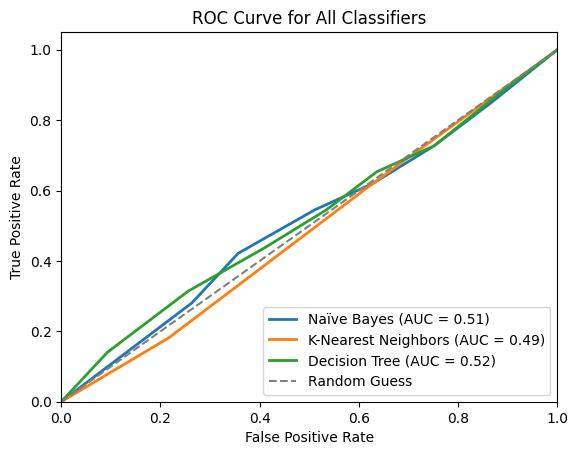

In [24]:
plt.figure()
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Classifiers')
plt.legend(loc='lower right')
plt.show()
